In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv("death-rates-from-air-pollution.csv")
#Filtering out India to understand deaths due to air pollution in a developing country
newdf = df[(df.Code == "IND")]

In [51]:
newdf
newdf.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
2660,India,IND,1990,211.37673844,140.87307793,57.50013738,25.47961556
2661,India,IND,1991,209.53810174,138.36245644,58.19447381,25.35209046
2662,India,IND,1992,207.46259368,135.45920914,59.06068754,25.13918652
2663,India,IND,1993,201.13928319,129.96319815,58.52832731,24.44859043
2664,India,IND,1994,195.99102399,125.20398787,58.33405819,23.94979162


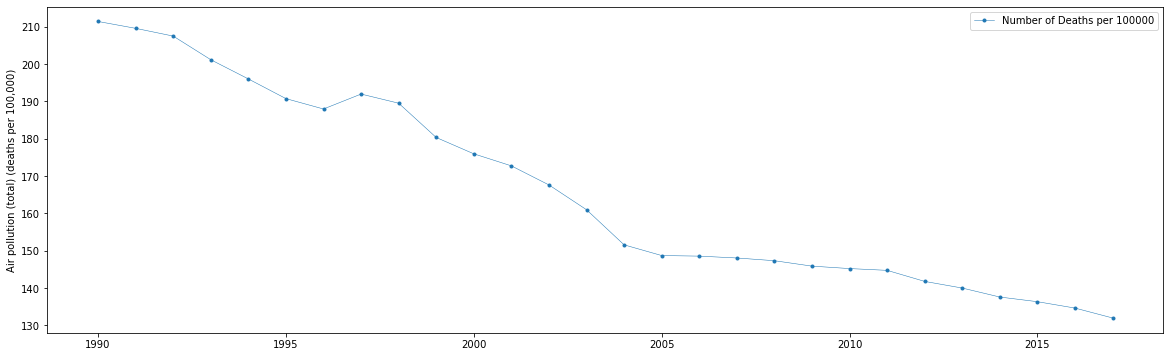

In [52]:
import warnings
import matplotlib.pyplot as plt
y = newdf['Air pollution (total) (deaths per 100,000)']
x = newdf['Year']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x,y,marker='.', linestyle='-', linewidth=0.5, label='Number of Deaths per 100000')
ax.set_ylabel('Air pollution (total) (deaths per 100,000)')
ax.legend();

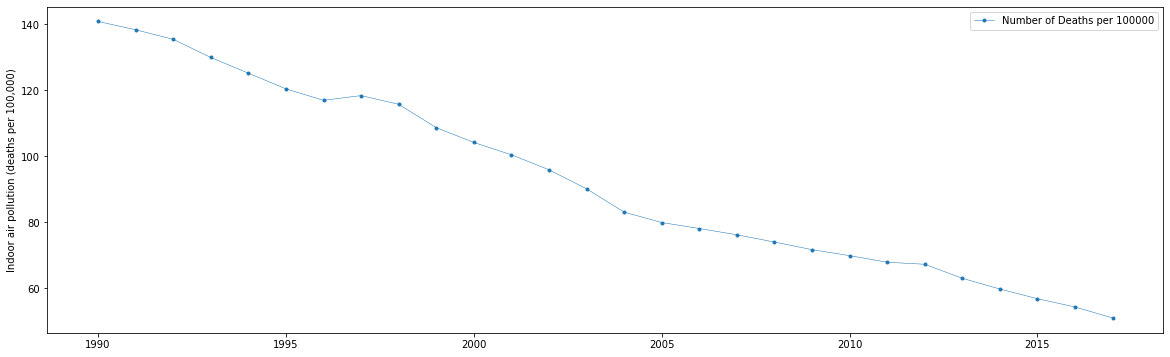

In [53]:
a = newdf['Indoor air pollution (deaths per 100,000)']
x = newdf['Year']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x,a,marker='.', linestyle='-', linewidth=0.5, label='Number of Deaths per 100000')
ax.set_ylabel('Indoor air pollution (deaths per 100,000)')
ax.legend();

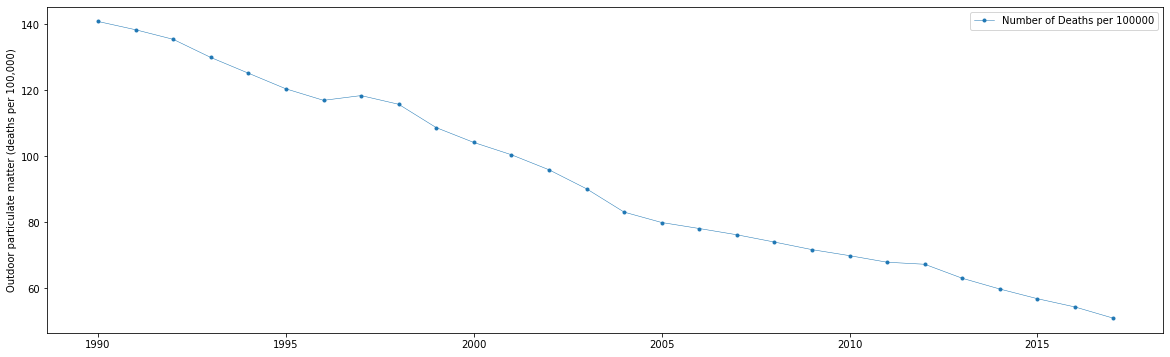

In [54]:
b= newdf['Outdoor particulate matter (deaths per 100,000)']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x,a,marker='.', linestyle='-', linewidth=0.5, label='Number of Deaths per 100000')
ax.set_ylabel('Outdoor particulate matter (deaths per 100,000)')
ax.legend();

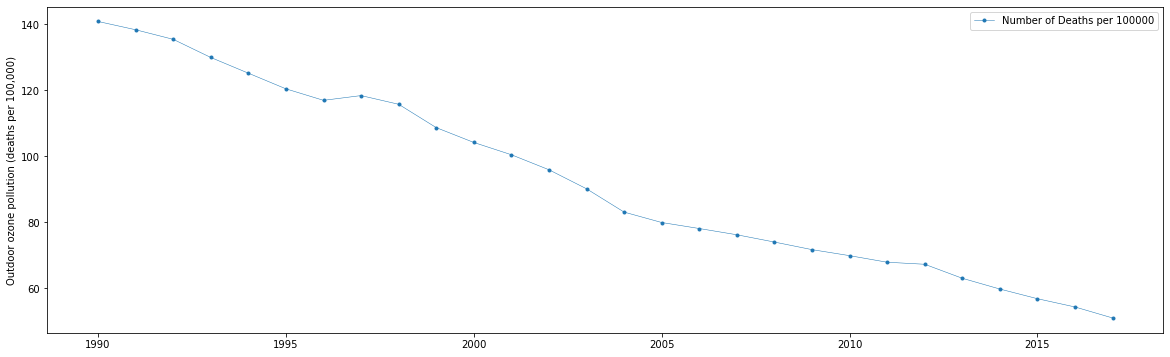

In [55]:
c= newdf['Outdoor ozone pollution (deaths per 100,000)']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x,a,marker='.', linestyle='-', linewidth=0.5, label='Number of Deaths per 100000')
ax.set_ylabel('Outdoor ozone pollution (deaths per 100,000)')
ax.legend();

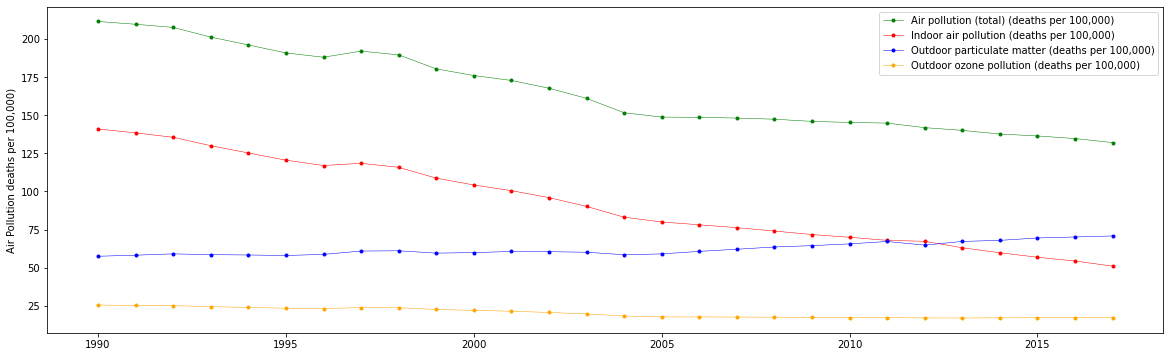

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x,y,marker='.', linestyle='-', linewidth=0.5,color = 'green',label='Air pollution (total) (deaths per 100,000)')
ax.plot(x,a,marker='.', linestyle='-', linewidth=0.5,color = 'red',label='Indoor air pollution (deaths per 100,000)')
ax.plot(x,b,marker='.', linestyle='-', linewidth=0.5,color = 'blue',label='Outdoor particulate matter (deaths per 100,000)')
ax.plot(x,c,marker='.', linestyle='-', linewidth=0.5,color = 'orange',label='Outdoor ozone pollution (deaths per 100,000)')
ax.set_ylabel('Air Pollution deaths per 100,000)')
ax.legend();

In [57]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',periodextrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

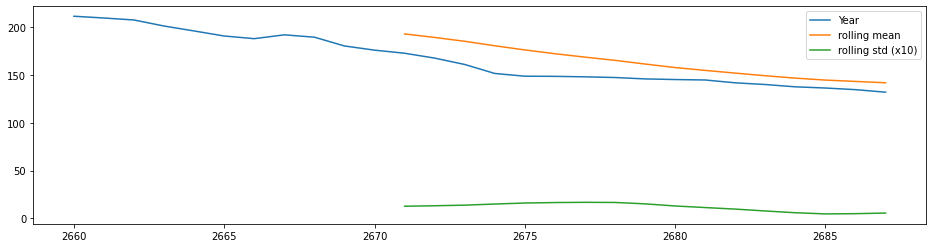

In [58]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'Year')

In [87]:
#Linear Regression for Air Pollution Deaths in India
df_binary = newdf[['Year', 'Air pollution (total) (deaths per 100,000)']]
df_binary.columns = ['Year', 'Air pollution (total) (deaths per 100,000)']
df_binary.head()

,Year,"Air pollution (total) (deaths per 100,000)"
2660,1990,211.37673844
2661,1991,209.53810174
2662,1992,207.46259368
2663,1993,201.13928319
2664,1994,195.99102399


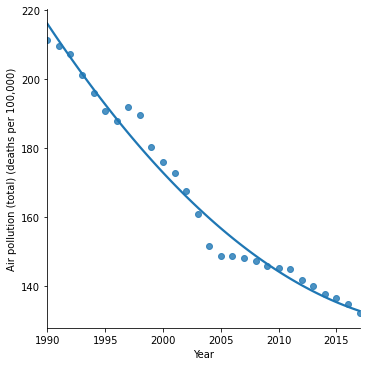

In [88]:
# Plotting the data scatter
sns.lmplot(x ="Year", y ="Air pollution (total) (deaths per 100,000)", data = df_binary, order = 2, ci = None)

In [89]:
X = np.array(df_binary['Year']).reshape(-1, 1)
y = np.array(df_binary['Air pollution (total) (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8696311647264541


<ipython-input-89-7e83710c295c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


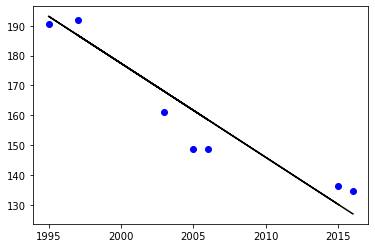

In [90]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [91]:
#Linear Regression for Indoor Air Pollution Deaths in India
df_binary1 = newdf[['Year', 'Indoor air pollution (deaths per 100,000)']]
df_binary1.columns = ['Year', 'Indoor air pollution (deaths per 100,000)']
df_binary1.head()

,Year,"Indoor air pollution (deaths per 100,000)"
2660,1990,140.87307793
2661,1991,138.36245644
2662,1992,135.45920914
2663,1993,129.96319815
2664,1994,125.20398787


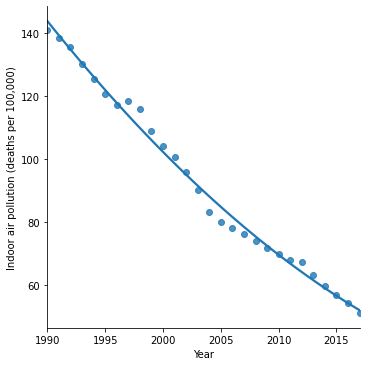

In [92]:
sns.lmplot(x ="Year", y ="Indoor air pollution (deaths per 100,000)", data = df_binary1, order = 2, ci = None)

In [93]:
X = np.array(df_binary1['Year']).reshape(-1, 1)
y = np.array(df_binary1['Indoor air pollution (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary1.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9747710029864649


<ipython-input-93-0b2876952b76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary1.dropna(inplace = True)


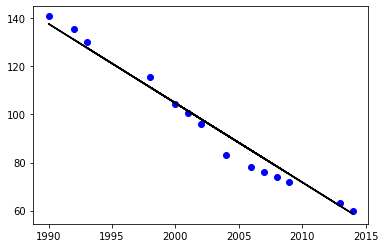

In [94]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [95]:
#Linear Regression for Outdoor Particulate Matter Deaths in India
df_binary2 = newdf[['Year', 'Outdoor particulate matter (deaths per 100,000)']]
df_binary2.columns = ['Year', 'Outdoor particulate matter (deaths per 100,000)']
df_binary2.head()

,Year,"Outdoor particulate matter (deaths per 100,000)"
2660,1990,57.50013738
2661,1991,58.19447381
2662,1992,59.06068754
2663,1993,58.52832731
2664,1994,58.33405819


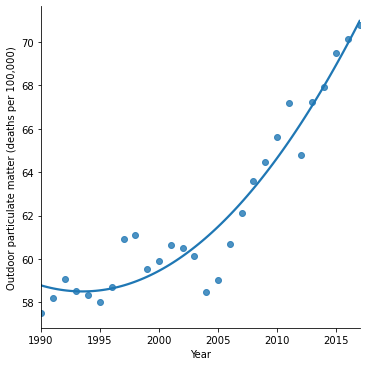

In [96]:
sns.lmplot(x ="Year", y ="Outdoor particulate matter (deaths per 100,000)", data = df_binary2, order = 2, ci = None)

In [97]:
X = np.array(df_binary2['Year']).reshape(-1, 1)
y = np.array(df_binary2['Outdoor particulate matter (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary2.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9121903259572741


<ipython-input-97-f0cca130970d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary2.dropna(inplace = True)


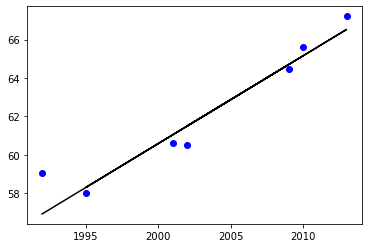

In [98]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [99]:
#Linear Regression for Outdoor Ozone Pollution Deaths in India
df_binary3 = newdf[['Year', 'Outdoor ozone pollution (deaths per 100,000)']]
df_binary3.columns = ['Year', 'Outdoor ozone pollution (deaths per 100,000)']
df_binary3.head()

,Year,"Outdoor ozone pollution (deaths per 100,000)"
2660,1990,25.47961556
2661,1991,25.35209046
2662,1992,25.13918652
2663,1993,24.44859043
2664,1994,23.94979162


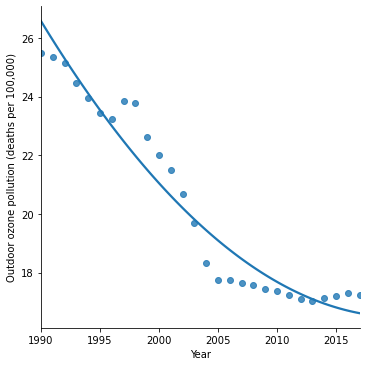

In [100]:
sns.lmplot(x ="Year", y ="Outdoor ozone pollution (deaths per 100,000)", data = df_binary3, order = 2, ci = None)

In [101]:
X = np.array(df_binary3['Year']).reshape(-1, 1)
y = np.array(df_binary3['Outdoor ozone pollution (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary3.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.963812987184233


<ipython-input-101-f9758c8b0566>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary3.dropna(inplace = True)


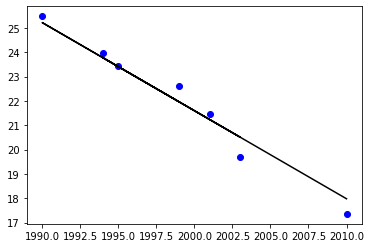

In [102]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [103]:
#Applying Linear Regression for a Developed Country - USA
newdf1 = df[(df.Code == "USA")]
newdf1

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
6076,United States,USA,1990,31.19506955,0.28339590,28.08403501,3.28170253
6077,United States,USA,1991,30.85611355,0.27122544,27.70024143,3.34816423
6078,United States,USA,1992,30.27920293,0.25700709,27.10677077,3.38314073
6079,United States,USA,1993,30.75235543,0.25234332,27.44725097,3.54128536
6080,United States,USA,1994,30.47438786,0.24127996,27.12267939,3.60616039
6081,United States,USA,1995,30.35046372,0.23024617,26.93429165,3.69074790
6082,United States,USA,1996,29.99271237,0.21864228,26.56635431,3.71758437
6083,United States,USA,1997,29.64126205,0.21056204,26.18573731,3.76126851
6084,United States,USA,1998,29.42022044,0.20173209,25.90635708,3.83850921
6085,United States,USA,1999,29.53359911,0.19534092,25.89521481,3.98903276


In [104]:
newdf1.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
6076,United States,USA,1990,31.19506955,0.28339590,28.08403501,3.28170253
6077,United States,USA,1991,30.85611355,0.27122544,27.70024143,3.34816423
6078,United States,USA,1992,30.27920293,0.25700709,27.10677077,3.38314073
6079,United States,USA,1993,30.75235543,0.25234332,27.44725097,3.54128536
6080,United States,USA,1994,30.47438786,0.24127996,27.12267939,3.60616039


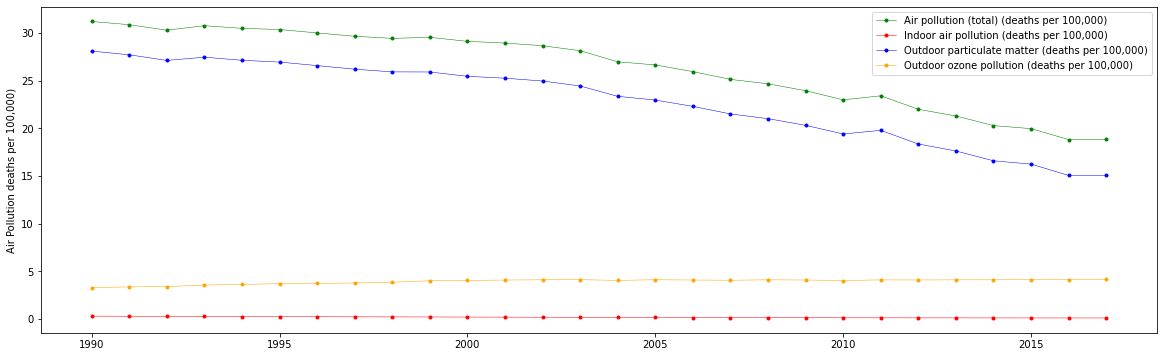

In [105]:
fig, ax = plt.subplots(figsize=(20, 6))
x1=newdf1['Year']
y1= newdf1['Air pollution (total) (deaths per 100,000)']
a1 = newdf1['Indoor air pollution (deaths per 100,000)']
b1= newdf1['Outdoor particulate matter (deaths per 100,000)']
c1= newdf1['Outdoor ozone pollution (deaths per 100,000)']
ax.plot(x1,y1,marker='.', linestyle='-', linewidth=0.5,color = 'green',label='Air pollution (total) (deaths per 100,000)')
ax.plot(x1,a1,marker='.', linestyle='-', linewidth=0.5,color = 'red',label='Indoor air pollution (deaths per 100,000)')
ax.plot(x1,b1,marker='.', linestyle='-', linewidth=0.5,color = 'blue',label='Outdoor particulate matter (deaths per 100,000)')
ax.plot(x1,c1,marker='.', linestyle='-', linewidth=0.5,color = 'orange',label='Outdoor ozone pollution (deaths per 100,000)')
ax.set_ylabel('Air Pollution deaths per 100,000)')
ax.legend();

In [106]:
#Linear Regression for Air Pollution Deaths in USA
df_binary4 = newdf1[['Year', 'Air pollution (total) (deaths per 100,000)']]
df_binary4.columns = ['Year', 'Air pollution (total) (deaths per 100,000)']
df_binary4.head()

,Year,"Air pollution (total) (deaths per 100,000)"
6076,1990,31.19506955
6077,1991,30.85611355
6078,1992,30.27920293
6079,1993,30.75235543
6080,1994,30.47438786


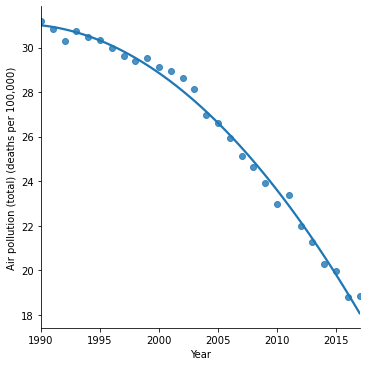

In [107]:
sns.lmplot(x ="Year", y ="Air pollution (total) (deaths per 100,000)", data = df_binary4, order = 2, ci = None)

In [109]:
X = np.array(df_binary4['Year']).reshape(-1, 1)
y = np.array(df_binary4['Air pollution (total) (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary4.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8973638740584912


<ipython-input-109-e02826d04534>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary4.dropna(inplace = True)


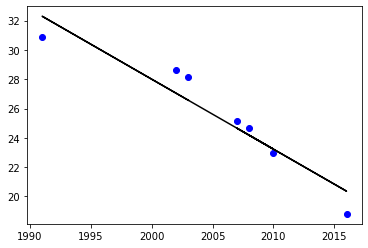

In [110]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [111]:
#Linear Regression for Indoor Air Pollution Deaths in USA
df_binary5 = newdf1[['Year', 'Indoor air pollution (deaths per 100,000)']]
df_binary5.columns = ['Year', 'Indoor air pollution (deaths per 100,000)']
df_binary5.head()

,Year,"Indoor air pollution (deaths per 100,000)"
6076,1990,0.28339590
6077,1991,0.27122544
6078,1992,0.25700709
6079,1993,0.25234332
6080,1994,0.24127996


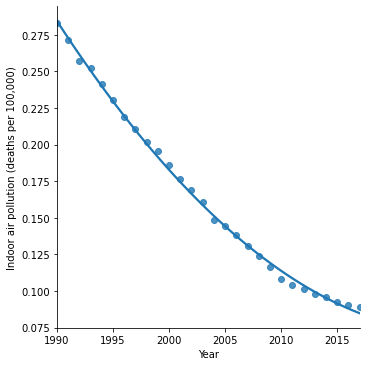

In [112]:
sns.lmplot(x ="Year", y ="Indoor air pollution (deaths per 100,000)", data = df_binary5, order = 2, ci = None)

In [113]:
X = np.array(df_binary5['Year']).reshape(-1, 1)
y = np.array(df_binary5['Indoor air pollution (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary5.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.976040054010784


<ipython-input-113-8c2925e714cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary5.dropna(inplace = True)


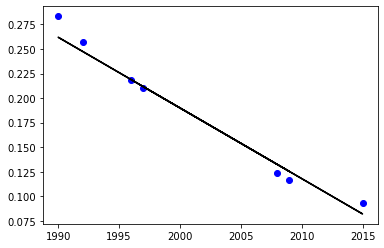

In [114]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [115]:
#Linear Regression for Outdoor Particulate Matter Deaths in USA
df_binary6= newdf1[['Year', 'Outdoor particulate matter (deaths per 100,000)']]
df_binary6.columns = ['Year', 'Outdoor particulate matter (deaths per 100,000)']
df_binary6.head()

,Year,"Outdoor particulate matter (deaths per 100,000)"
6076,1990,28.08403501
6077,1991,27.70024143
6078,1992,27.10677077
6079,1993,27.44725097
6080,1994,27.12267939


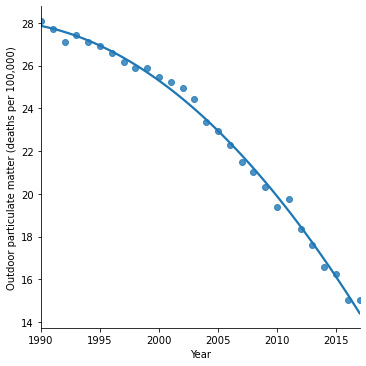

In [116]:
sns.lmplot(x ="Year", y ="Outdoor particulate matter (deaths per 100,000)", data = df_binary6, order = 2, ci = None)

In [117]:
X = np.array(df_binary6['Year']).reshape(-1, 1)
y = np.array(df_binary6['Outdoor particulate matter (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary6.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9508925851893218


<ipython-input-117-3e8e875bea44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary6.dropna(inplace = True)


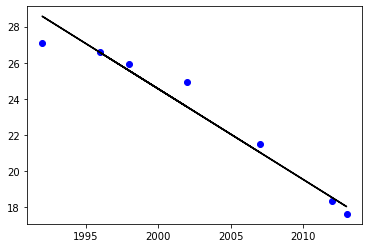

In [118]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [119]:
#Linear Regression for Outdoor ozone pollution (deaths per 100,000) in USA
df_binary7= newdf1[['Year', 'Outdoor ozone pollution (deaths per 100,000)']]
df_binary7.columns = ['Year', 'Outdoor ozone pollution (deaths per 100,000)']
df_binary7.head()

,Year,"Outdoor ozone pollution (deaths per 100,000)"
6076,1990,3.28170253
6077,1991,3.34816423
6078,1992,3.38314073
6079,1993,3.54128536
6080,1994,3.60616039


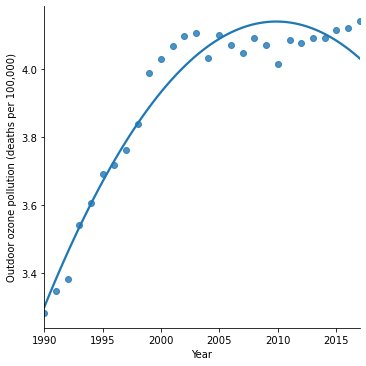

In [120]:
sns.lmplot(x ="Year", y ="Outdoor ozone pollution (deaths per 100,000)", data = df_binary7, order = 2, ci = None)

In [121]:
X = np.array(df_binary7['Year']).reshape(-1, 1)
y = np.array(df_binary7['Outdoor ozone pollution (deaths per 100,000)']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary7.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6638235969748278


<ipython-input-121-4670323d8f0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary7.dropna(inplace = True)


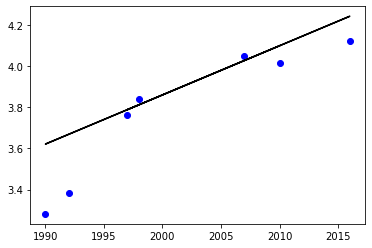

In [122]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()